# Projet - Analyse de données - Subvention des Associations

### Amaury Richard & Victoire Flesselles

## Données utilisées

Nous allons étudier la répartition des subventions accordées aux différentes associations parisiennes sur 8 ans de 2013 à 2020. La documentation de la source de données est disponible [ici](https://opendata.paris.fr/explore/dataset/subventions-accordees-et-refusees/information/?disjunctive.collectivite&disjunctive.nom_beneficiaire&disjunctive.direction&disjunctive.secteurs_d_activites_definies_par_l_association&fbclid=IwAR3XJekkoUasIjGTl346zJSyoJCs4rmpXmQAwNcqLOcPfIdz8MaIro_dUUs&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJwaWUiLCJmdW5jIjoiU1VNIiwieUF4aXMiOiJtb250YW50X3ZvdGUiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1QYWlyZWQiLCJwb3NpdGlvbiI6ImNlbnRlciJ9XSwieEF4aXMiOiJuYXR1cmVfZGVfbGFfc3VidmVudGlvbiIsIm1heHBvaW50cyI6MTAwLCJzb3J0Ijoic2VyaWUxLTEiLCJzZXJpZXNCcmVha2Rvd24iOiIiLCJzZXJpZXNCcmVha2Rvd25UaW1lc2NhbGUiOiIiLCJ0aW1lc2NhbGUiOiIiLCJjb25maWciOnsiZGF0YXNldCI6InN1YnZlbnRpb25zLWFjY29yZGVlcy1ldC1yZWZ1c2VlcyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuY29sbGVjdGl2aXRlIjp0cnVlLCJkaXNqdW5jdGl2ZS5ub21fYmVuZWZpY2lhaXJlIjp0cnVlLCJkaXNqdW5jdGl2ZS5kaXJlY3Rpb24iOnRydWUsImRpc2p1bmN0aXZlLnNlY3RldXJzX2RfYWN0aXZpdGVzX2RlZmluaWVzX3Bhcl9sX2Fzc29jaWF0aW9uIjp0cnVlLCJmYmNsaWQiOiJJd0FSM1hKZWtrb1Vhc0lqR1RsMzQ2ekpTeW9KQ3M0cm1wWG1RQXdOY3FMT2NQZklkejhNYUlyb19kVVVzIn19fV0sInRpbWVzY2FsZSI6IiIsImRpc3BsYXlMZWdlbmQiOnRydWUsImFsaWduTW9udGgiOnRydWV9).

## Import des données

In [143]:
import pandas

In [144]:
import matplotlib as plt

In [145]:
assos = pandas.read_csv("subventions-accordees-et-refusees.csv",sep=";")

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Vérifions que le fichier ait bien chargé

In [146]:
assos.head()

,Numéro de dossier,Année budgétaire,Collectivité,Nom Bénéficiaire,Numéro Siret,Objet du dossier,Montant voté,Direction,Nature de la subvention,Secteurs d'activités définies par l'association
0,2020_07586,2020,Ville de Paris,13 POUR TOUS,48905531900029,Co-financement DDCT d'un poste adultes-relais ...,4700,DDCT,Fonctionnement,Loisirs;Social;Vie et animation locale
1,2020_08053,2020,Ville de Paris,13 POUR TOUS,48905531900029,CS 2020/DASES SEPLEX,209692,DASES,Fonctionnement,Loisirs;Social;Vie et animation locale
2,2020_04885,2020,Ville de Paris,3 S : SEJOUR SPORTIF SOLIDAIRE,81147565600013,Ressourcerie Ephémère,0,DAE,Non précisée,Environnement & écologie;Sport;Vie et animatio...
3,2020_05032,2020,Ville de Paris,4 A 4 DIX HUIT,48909505900015,De Mômes et d'opérette : Des grottes de Lascau...,0,DASCO,Non précisée,Culture & Arts;Social;Sport
4,2020_02992,2020,Ville de Paris,ABC PUERICULTURE,34482479200032,Fonctionnement 2020 cité des ours 14 cité fala...,217134,DFPE,Fonctionnement,Education & formation;Santé;Social


## Préparer les données pour les exploiter correctement

La documentation nous informe que la colonne "Secteurs d'activités définies par l'association" comporte au maximum trois attributs. Nous allons spliter les attributs de cette colonne afin de les exploiter par la suite.

In [147]:
assos["Secteurs d'activités définies par l'association"].str.split(";",expand=True)[0]

assos.insert(10,"Secteur Activité 1",assos["Secteurs d'activités définies par l'association"].str.split(";",expand=True)[0])
assos.insert(11,"Secteur Activité 2",assos["Secteurs d'activités définies par l'association"].str.split(";",expand=True)[1])
assos.insert(12,"Secteur Activité 3",assos["Secteurs d'activités définies par l'association"].str.split(";",expand=True)[2])
del assos["Secteurs d'activités définies par l'association"]

In [148]:
assos.head()

,Numéro de dossier,Année budgétaire,Collectivité,Nom Bénéficiaire,Numéro Siret,Objet du dossier,Montant voté,Direction,Nature de la subvention,Secteur Activité 1,Secteur Activité 2,Secteur Activité 3
0,2020_07586,2020,Ville de Paris,13 POUR TOUS,48905531900029,Co-financement DDCT d'un poste adultes-relais ...,4700,DDCT,Fonctionnement,Loisirs,Social,Vie et animation locale
1,2020_08053,2020,Ville de Paris,13 POUR TOUS,48905531900029,CS 2020/DASES SEPLEX,209692,DASES,Fonctionnement,Loisirs,Social,Vie et animation locale
2,2020_04885,2020,Ville de Paris,3 S : SEJOUR SPORTIF SOLIDAIRE,81147565600013,Ressourcerie Ephémère,0,DAE,Non précisée,Environnement & écologie,Sport,Vie et animation locale
3,2020_05032,2020,Ville de Paris,4 A 4 DIX HUIT,48909505900015,De Mômes et d'opérette : Des grottes de Lascau...,0,DASCO,Non précisée,Culture & Arts,Social,Sport
4,2020_02992,2020,Ville de Paris,ABC PUERICULTURE,34482479200032,Fonctionnement 2020 cité des ours 14 cité fala...,217134,DFPE,Fonctionnement,Education & formation,Santé,Social


Nous allons enregistrer ce fichier "splité".

In [149]:
assos.to_csv('./subventions-accordees-et-refusees-split.csv',sep=';',index=False)

## Nettoyer et alléger les données

Regardons les informations techniques du tableau.

In [150]:
assos.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73034 entries, 0 to 73033
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Numéro de dossier        73034 non-null  object
 1   Année budgétaire         73034 non-null  int64 
 2   Collectivité             73034 non-null  object
 3   Nom Bénéficiaire         73013 non-null  object
 4   Numéro Siret             72843 non-null  object
 5   Objet du dossier         73034 non-null  object
 6   Montant voté             73034 non-null  int64 
 7   Direction                73034 non-null  object
 8   Nature de la subvention  73034 non-null  object
 9   Secteur Activité 1       72994 non-null  object
 10  Secteur Activité 2       61353 non-null  object
 11  Secteur Activité 3       51102 non-null  object
dtypes: int64(2), object(10)
memory usage: 6.7+ MB


On remarque que la mémoire utilise 6,7 MB de stockage.

Nous allons étudier la tendance sur les 5000 premières lignes pour alléger les données et l'espace mémoire.

In [151]:
assos_study = pandas.read_csv("subventions-accordees-et-refusees-split.csv",sep=";",nrows=25000)

In [152]:
assos_study.head()

,Numéro de dossier,Année budgétaire,Collectivité,Nom Bénéficiaire,Numéro Siret,Objet du dossier,Montant voté,Direction,Nature de la subvention,Secteur Activité 1,Secteur Activité 2,Secteur Activité 3
0,2020_07586,2020,Ville de Paris,13 POUR TOUS,48905531900029,Co-financement DDCT d'un poste adultes-relais ...,4700,DDCT,Fonctionnement,Loisirs,Social,Vie et animation locale
1,2020_08053,2020,Ville de Paris,13 POUR TOUS,48905531900029,CS 2020/DASES SEPLEX,209692,DASES,Fonctionnement,Loisirs,Social,Vie et animation locale
2,2020_04885,2020,Ville de Paris,3 S : SEJOUR SPORTIF SOLIDAIRE,81147565600013,Ressourcerie Ephémère,0,DAE,Non précisée,Environnement & écologie,Sport,Vie et animation locale
3,2020_05032,2020,Ville de Paris,4 A 4 DIX HUIT,48909505900015,De Mômes et d'opérette : Des grottes de Lascau...,0,DASCO,Non précisée,Culture & Arts,Social,Sport
4,2020_02992,2020,Ville de Paris,ABC PUERICULTURE,34482479200032,Fonctionnement 2020 cité des ours 14 cité fala...,217134,DFPE,Fonctionnement,Education & formation,Santé,Social


Affichons le type de données et le nombre de valeurs non nulles dans chaque colonne.

In [153]:
assos_study.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Numéro de dossier        25000 non-null  object
 1   Année budgétaire         25000 non-null  int64 
 2   Collectivité             25000 non-null  object
 3   Nom Bénéficiaire         24992 non-null  object
 4   Numéro Siret             24957 non-null  object
 5   Objet du dossier         25000 non-null  object
 6   Montant voté             25000 non-null  int64 
 7   Direction                25000 non-null  object
 8   Nature de la subvention  25000 non-null  object
 9   Secteur Activité 1       24990 non-null  object
 10  Secteur Activité 2       21031 non-null  object
 11  Secteur Activité 3       17529 non-null  object
dtypes: int64(2), object(10)
memory usage: 2.3+ MB


<AxesSubplot:ylabel='Frequency'>

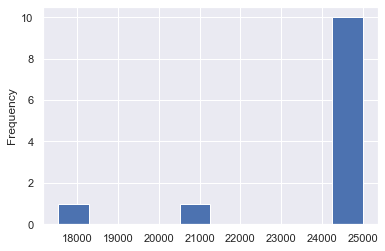

In [154]:
column_count = assos_study.count()
column_count.plot.hist()

Au vu des résultats ci-dessus, nous avons décidé de garder toutes les colonnes qui sont pour la plupart totalement remplies.

## Gagner de l'espace mémoire en modifiant le type de données

In [155]:
assos_study.nunique()

Numéro de dossier          24995
Année budgétaire               8
Collectivité                   2
Nom Bénéficiaire            6326
Numéro Siret                6015
Objet du dossier           18616
Montant voté                2170
Direction                     25
Nature de la subvention        4
Secteur Activité 1            22
Secteur Activité 2            21
Secteur Activité 3            18
dtype: int64

Regardons quelles valeurs sont récurrentes dans les colonnes avec peu de valeurs uniques.

In [156]:
assos_study['Année budgétaire'].unique()

array([2020, 2019, 2017, 2018, 2016, 2013, 2014, 2015])

In [157]:
assos_study['Collectivité'].unique()

array(['Ville de Paris', 'Département de Paris'], dtype=object)

In [158]:
assos_study['Direction'].unique()

array(['DDCT', 'DASES', 'DAE', 'DASCO', 'DFPE', 'DAC', 'DEVE', 'DPSP',
       'DJS', 'DPE', 'DGRI', 'DVD', 'SG', 'DGOM', 'CASVP', 'DU', 'DRH',
       'DLH', 'DPVI', 'DUCT', 'SG-MI-CINEMA', 'SG-DPMC', 'DFA', 'DICOM',
       'SGCP'], dtype=object)

In [159]:
assos_study['Nature de la subvention'].unique()

array(['Fonctionnement', 'Non précisée', 'Projet', 'Investissement'],
      dtype=object)

In [160]:
assos_study['Secteur Activité 1'].unique()

array(['Loisirs', 'Environnement & écologie', 'Culture & Arts',
       'Education & formation', 'Vie et animation locale', 'Emploi',
       'Aides aux associations', 'Santé', 'Communication & média',
       'Social', 'Humanitaire', 'Sport',
       'Défense des droits et des intérêts', 'Economie', 'Mémoire',
       'Précarité & Exclusion', 'Architecture & urbanisme',
       'Idée & opinion', 'Relations internationales',
       'Déplacements et transports', 'Tourisme', nan,
       'Technique & Recherche'], dtype=object)

In [161]:
assos_study['Secteur Activité 2'].unique()

array(['Social', 'Sport', 'Santé', nan, 'Mémoire',
       'Précarité & Exclusion', 'Emploi', 'Environnement & écologie',
       'Education & formation', 'Défense des droits et des intérêts',
       'Vie et animation locale', 'Culture & Arts', 'Loisirs',
       'Humanitaire', 'Relations internationales', 'Economie',
       'Idée & opinion', 'Technique & Recherche', 'Tourisme',
       'Déplacements et transports', 'Communication & média',
       'Architecture & urbanisme'], dtype=object)

In [162]:
assos_study['Secteur Activité 3'].unique()

array(['Vie et animation locale', 'Sport', 'Social', nan,
       'Précarité & Exclusion', 'Technique & Recherche',
       'Environnement & écologie', 'Loisirs', 'Santé', 'Mémoire',
       'Idée & opinion', 'Education & formation', 'Emploi', 'Tourisme',
       'Relations internationales', 'Humanitaire', 'Economie',
       'Culture & Arts', 'Défense des droits et des intérêts'],
      dtype=object)

In [163]:
assos_study.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Numéro de dossier        25000 non-null  object
 1   Année budgétaire         25000 non-null  int64 
 2   Collectivité             25000 non-null  object
 3   Nom Bénéficiaire         24992 non-null  object
 4   Numéro Siret             24957 non-null  object
 5   Objet du dossier         25000 non-null  object
 6   Montant voté             25000 non-null  int64 
 7   Direction                25000 non-null  object
 8   Nature de la subvention  25000 non-null  object
 9   Secteur Activité 1       24990 non-null  object
 10  Secteur Activité 2       21031 non-null  object
 11  Secteur Activité 3       17529 non-null  object
dtypes: int64(2), object(10)
memory usage: 2.3+ MB


In [164]:
from pandas.api.types import CategoricalDtype
dtype ={
    'Année budgétaire':CategoricalDtype(categories=[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], ordered=True),
    'Collectivité':'category',
    'Direction':'category',
    'Nature de la subvention':'category',
    'Secteur Activité 1':'category',
    'Secteur Activité 2':'category',
    'Secteur Activité 3':'category'
}

In [165]:
assos_study = pandas.read_csv("subventions-accordees-et-refusees-split.csv",sep=";",nrows=25000,dtype=dtype)

In [166]:
assos_study.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Numéro de dossier        25000 non-null  object  
 1   Année budgétaire         25000 non-null  category
 2   Collectivité             25000 non-null  category
 3   Nom Bénéficiaire         24992 non-null  object  
 4   Numéro Siret             24957 non-null  object  
 5   Objet du dossier         25000 non-null  object  
 6   Montant voté             25000 non-null  int64   
 7   Direction                25000 non-null  category
 8   Nature de la subvention  25000 non-null  category
 9   Secteur Activité 1       24990 non-null  category
 10  Secteur Activité 2       21031 non-null  category
 11  Secteur Activité 3       17529 non-null  category
dtypes: category(7), int64(1), object(4)
memory usage: 1.1+ MB


In [167]:
assos = pandas.read_csv("subventions-accordees-et-refusees-split.csv",sep=";",dtype=dtype)

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [168]:
assos.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73034 entries, 0 to 73033
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Numéro de dossier        73034 non-null  object  
 1   Année budgétaire         69690 non-null  category
 2   Collectivité             73034 non-null  category
 3   Nom Bénéficiaire         73013 non-null  object  
 4   Numéro Siret             72843 non-null  object  
 5   Objet du dossier         73034 non-null  object  
 6   Montant voté             73034 non-null  int64   
 7   Direction                73034 non-null  category
 8   Nature de la subvention  73034 non-null  category
 9   Secteur Activité 1       72994 non-null  category
 10  Secteur Activité 2       61353 non-null  category
 11  Secteur Activité 3       51102 non-null  category
dtypes: category(7), int64(1), object(4)
memory usage: 3.3+ MB


La mémoire n'occupe plus que 3,3 MB contre 6,7 MB tout à l'heure.

## Analyse descriptive des données

Montant total des subventions votées par exercice budgétaire 

<AxesSubplot:xlabel='Année', ylabel="Millions d'euros">

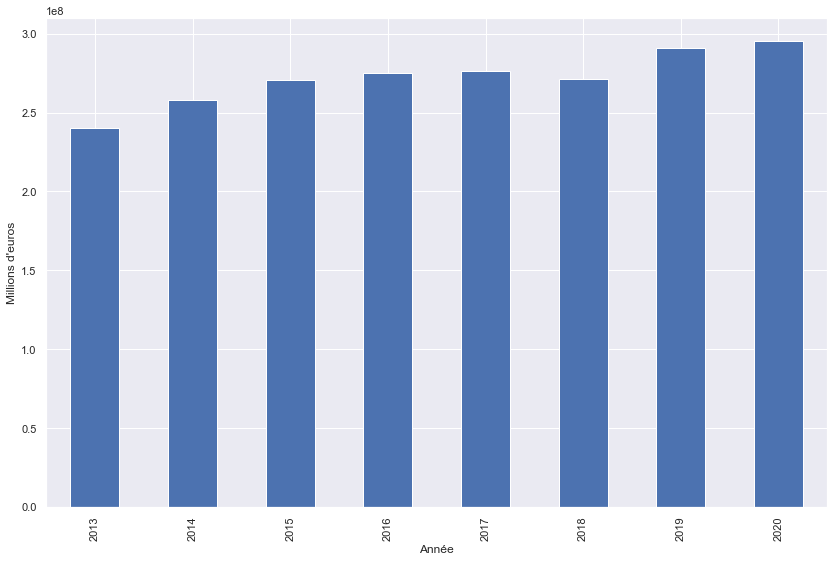

In [169]:
amount_year = assos.groupby(['Année budgétaire'])[('Montant voté')].sum()
amount_year.plot(
    kind = "bar", 
    xlabel="Année",
    ylabel = "Millions d'euros",
    figsize = (14,9)
)

In [170]:
assos['Montant voté'].sum()

2299253802

 Les 20 premières associations bénéficiaires par montants votés 

In [171]:
assos_max = assos.groupby("Nom Bénéficiaire").sum()
assos_max.sort_values(by = 'Montant voté',ascending=False).head(20)

,Montant voté
Nom Bénéficiaire,
THEATRE MUSICAL DE PARIS,131831000
ASSOCIATION D'ACTION SOCIALE EN FAVEUR DES PERSONNELS DE LA VILLE DE PARIS ET DU DÉPARTEMENT DE PARIS,79250743
ASSOCIATION DU THÉÂTRE DE LA VILLE,70139300
ASSOCIATION POUR LA GESTION DES OEUVRES SOCIALES DU PERSONNEL DES ADMINISTRATIONS PARISIENNES,65215618
FORUM DES IMAGES,58722904
FONDATION OEUVRE DE LA CROIX SAINT-SIMON,52788800
PHILHARMONIE DE PARIS,42323233
ATELIER PARISIEN D'URBANISME,40287504
CRESCENDO,39964636


In [172]:
assos_max['Montant voté'].sum()

2299015402

In [173]:
df_assos_an = pandas.pivot_table(assos_study,columns="Année budgétaire",values="Montant voté",index="Nom Bénéficiaire",aggfunc="sum")
df_assos_an

Année budgétaire,2013,2014,2015,2016,2017,2018,2019,2020
Nom Bénéficiaire,,,,,,,,
"""ACP LA MANUFACTURE CHANSON""(DOUBLON AVEC LE 181331 CHANGEMENT DE NATURE JURIDIQUE)",30380,0,0,0,0,0,0,0
"""GROUPEMENT DE DEFENSE SANITAIRE DES ABEILLES DU VAL-DE-MARNE ET DE LA SEINE""",0,0,0,0,0,0,500,0
"""INSERTION. FORMATION. EMPLOI-BAT"" (I.F.E. - BAT)",0,0,0,0,0,0,0,0
"""JE.TU.IL...""",0,0,0,30000,70000,40000,0,0
"""KMK""",0,0,0,1500,0,0,0,0
...,...,...,...,...,...,...,...,...
ÉGALITÉ DES CHANCES DANS LES ÉTUDES ET LA PROFESSION D'INGÉNIEURS EN EUROPE,0,0,0,0,0,2000,0,0
ÉLAN INTERCULTUREL,0,0,0,0,0,0,3000,0
ÉNERGIE PARTAGÉE,2280,0,0,0,0,0,0,0


## Analyse en composante principale

In [174]:
Liste1=assos[["Secteur Activité 1","Montant voté","Année budgétaire"]].rename(columns={"Secteur Activité 1":"Secteur Activité"})
Liste2=assos[["Secteur Activité 2","Montant voté","Année budgétaire"]].rename(columns={"Secteur Activité 2":"Secteur Activité"})
Liste3=assos[["Secteur Activité 3","Montant voté","Année budgétaire"]].rename(columns={"Secteur Activité 3":"Secteur Activité"})

Montants_totaux=Liste1.append(Liste2)
Montants_totaux=Montants_totaux.append(Liste3)
Montants_totaux.groupby(["Année budgétaire","Secteur Activité"]).sum()


Montant voté
Année budgétaire Secteur Activité                                
2013             Aides aux associations                   2449754
                 Architecture & urbanisme                12997243
                 Communication & média                    1283184
                 Culture & Arts                          92317117
                 Défense des droits et des intérêts       4377576
...                                                           ...
2020             Social                                 135714720
                 Sport                                   11603251
                 Technique & Recherche                    1501994
                 Tourisme                                18009911
                 Vie et animation locale                 33322942

[176 rows x 1 columns]

In [175]:
Montants_totaux

,Secteur Activité,Montant voté,Année budgétaire
0,Loisirs,4700,2020
1,Loisirs,209692,2020
2,Environnement & écologie,0,2020
3,Culture & Arts,0,2020
4,Education & formation,217134,2020
...,...,...,...
73029,Vie et animation locale,4700,NaN
73030,Technique & Recherche,15000,NaN
73031,Relations internationales,2000,NaN
73032,Vie et animation locale,0,NaN


Construction d'un tableau double entrées (Pivot Table) avec les subventions par années selon les différents secteurs d'activités

In [176]:
Budget_secteurs_by_year=pandas.pivot_table(data=Montants_totaux,values="Montant voté",index=["Année budgétaire"],columns=["Secteur Activité"],aggfunc=sum)
Budget_secteurs_by_year

Secteur Activité,Aides aux associations,Architecture & urbanisme,Communication & média,Culture & Arts,Défense des droits et des intérêts,Déplacements et transports,Economie,Education & formation,Emploi,Environnement & écologie,...,Loisirs,Mémoire,Précarité & Exclusion,Relations internationales,Santé,Social,Sport,Technique & Recherche,Tourisme,Vie et animation locale
Année budgétaire,,,,,,,,,,,,,,,,,,,,,
2013,2449754,12997243,1283184,92317117,4377576,8789835,10867437,59984700,15184532,10736647,...,11505418,4243081,22754161,7881955,34779299,99793924,11030129,2791368,16492510,22456188
2014,2260588,29064376,1167967,108101375,4278383,9084819,11220437,61412367,17640365,10384355,...,12853945,4200499,20845819,6012461,34043645,102911718,9156281,1560414,17621088,21629438
2015,2223209,32828331,1992083,109370403,5138073,8866451,12441351,61311320,18737550,10823962,...,12387251,3261428,24444483,8187570,38156153,110720606,9432895,1674602,17791688,22838781
2016,3233999,10328743,3062285,89559360,5648211,8417484,13007339,66268628,24136192,11499366,...,12773417,4652790,35395141,9270627,48855904,132144455,9226576,1399709,16517195,30261954
2017,3603587,10274000,2375832,86571885,6035031,8420599,12452639,70167385,24377426,12194546,...,14628878,4420288,38137017,14931241,46045688,130497297,9877751,8282811,18338942,31108733
2018,3277861,10439127,2292350,88130773,6042916,8490459,11467098,66594882,24137190,12218266,...,13155775,4482657,37405317,8354366,51373807,132374622,10901137,1308882,12774986,30444315
2019,4145868,9445268,2418303,89921162,8476426,7993239,13945372,55204324,29748982,13043370,...,13353236,4544625,49542565,9125904,53982705,146088278,9459260,1133300,14495005,34184212
2020,4581626,10021622,2352048,94955556,7969361,7688415,14500755,54481828,32847339,12809257,...,13494712,5510107,52917415,9254623,53046110,135714720,11603251,1501994,18009911,33322942


In [177]:
Budget_secteurs_by_year.columns

Index(['Aides aux associations', 'Architecture & urbanisme',
       'Communication & média', 'Culture & Arts',
       'Défense des droits et des intérêts', 'Déplacements et transports',
       'Economie', 'Education & formation', 'Emploi',
       'Environnement & écologie', 'Humanitaire', 'Idée & opinion', 'Loisirs',
       'Mémoire', 'Précarité & Exclusion', 'Relations internationales',
       'Santé', 'Social', 'Sport', 'Technique & Recherche', 'Tourisme',
       'Vie et animation locale'],
      dtype='object', name='Secteur Activité')

Nous renommons les colonnes avec les acronymes suivants:
- AIA : Aides aux associations
- A&U : Architecture & urbanisme
- Com & Med : Communication & média 
- Cul & Art : Culture & Arts
- DfDr : Défense des droits et des intérêts
- TR : Déplacements et transports
- ECO : Economie
- EDU : Education & formation
- EMPL : Emploi
- ENV & ECO : Environnement & écologie
- HUM: Humanitaire
- I&O: Idée & opinion
- LOIS: Loisirs
- MEM : Mémoire
- PRE & EXC : Précarité & Exclusion
- RI : Relations internationales
- SA : Santé
- SOC : Social
- SP : Sport
- TECH & RE : Technique & Recherche
- TOUR : Tourisme
- V & ANIM : Vie et animation locale


In [178]:
Budget_secteurs_by_year.columns=['AIA','A&U','Com & Med','Cul & Art','DfDr','TR','ECO','EDU','EMPL','ENV & ECO','HUM','I&0','LOIS','MEM','PRE & EXC','RI','SA','SOC','SP','TECH & RE','TOUR','V & ANIM']


In [179]:
Budget_secteurs_by_year.describe()

,AIA,A&U,Com & Med,Cul & Art,DfDr,TR,ECO,EDU,EMPL,ENV & ECO,...,LOIS,MEM,PRE & EXC,RI,SA,SOC,SP,TECH & RE,TOUR,V & ANIM
count,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,...,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00
mean,3.222062e+06,1.567484e+07,2.118006e+06,9.486595e+07,5.995747e+06,8.468913e+06,1.248780e+07,6.192818e+07,2.335120e+07,1.171372e+07,...,1.301908e+07,4.414434e+06,3.518024e+07,9.127343e+06,4.503541e+07,1.237807e+08,1.008591e+07,2.456635e+06,1.650517e+07,2.828082e+07
std,8.758056e+05,9.536549e+06,6.266516e+05,8.934885e+06,1.534223e+06,4.600084e+05,1.294132e+06,5.523769e+06,6.023635e+06,1.000959e+06,...,9.044352e+05,6.191589e+05,1.201049e+07,2.576158e+06,8.223211e+06,1.694704e+07,9.504572e+05,2.407374e+06,1.945056e+06,5.136129e+06
min,2.223209e+06,9.445268e+06,1.167967e+06,8.657188e+07,4.278383e+06,7.688415e+06,1.086744e+07,5.448183e+07,1.518453e+07,1.038436e+07,...,1.150542e+07,3.261428e+06,2.084582e+07,6.012461e+06,3.404364e+07,9.979392e+07,9.156281e+06,1.133300e+06,1.277499e+07,2.162944e+07
25%,2.402462e+06,1.021091e+07,1.814858e+06,8.920221e+07,4.947949e+06,8.311423e+06,1.140543e+07,5.878961e+07,1.846325e+07,1.080213e+07,...,1.267688e+07,4.232436e+06,2.402190e+07,8.111166e+06,3.731194e+07,1.087684e+08,9.381315e+06,1.377002e+06,1.599313e+07,2.274313e+07
50%,3.255930e+06,1.038394e+07,2.322199e+06,9.111914e+07,5.841621e+06,8.455529e+06,1.244700e+07,6.136184e+07,2.413669e+07,1.184696e+07,...,1.300486e+07,4.451472e+06,3.640023e+07,8.740135e+06,4.745080e+07,1.313209e+08,9.668506e+06,1.531204e+06,1.706914e+07,3.035313e+07
75%,3.739157e+06,1.701403e+07,2.386450e+06,9.824201e+07,6.524527e+06,8.808989e+06,1.324185e+07,6.635019e+07,2.572032e+07,1.236601e+07,...,1.338860e+07,4.571666e+06,4.098840e+07,9.258624e+06,5.179188e+07,1.332096e+08,1.093338e+07,1.953794e+06,1.784624e+07,3.166229e+07
max,4.581626e+06,3.282833e+07,3.062285e+06,1.093704e+08,8.476426e+06,9.084819e+06,1.450076e+07,7.016738e+07,3.284734e+07,1.304337e+07,...,1.462888e+07,5.510107e+06,5.291742e+07,1.493124e+07,5.398270e+07,1.460883e+08,1.160325e+07,8.282811e+06,1.833894e+07,3.418421e+07


Importation des modules et fonctions de la librairie sklearn nécessaires à la mise en place de l'ACP

In [180]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import numpy

scaler = StandardScaler()

On centre et réduit les données de notre table pour faire en sorte que chacun de nos axes contribuent de la même manière à l'information. Création du dataframe X centré réduit à partir de notre table Budget secteurs par année.

In [181]:
X = pandas.DataFrame(scaler.fit_transform(Budget_secteurs_by_year), columns=Budget_secteurs_by_year.columns, index=Budget_secteurs_by_year.index)

### Calcul de l'ACP

In [182]:
pca=PCA()
pca.fit(X)

U = numpy.transpose(pca.components_) # vecteurs propres
C = pandas.DataFrame(X.dot(U)) # nouvelles coordonnées
I = pandas.DataFrame(pca.explained_variance_ratio_)  # information véhiculée

correlations = pandas.DataFrame([[C[facteur].corr(X[column]) for facteur in C] for column in X], index=X.columns)
quality = (C**2).div((X**2).sum(axis=1), axis='index')


### Interpréations de l'ACP

In [183]:
I

,0
0,6.272841e-01
1,1.456712e-01
2,8.777291e-02
3,7.227983e-02
4,2.999998e-02
5,2.015077e-02
6,1.684122e-02
7,1.951293e-33


Nombre d'axes

In [184]:
len(X.columns)

22

On représente l'inertie expliquée:

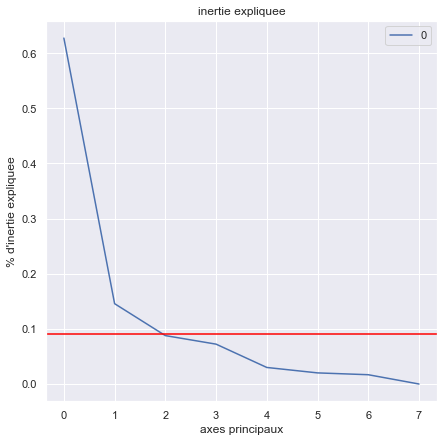

In [185]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7, 7)) 

I.plot(ax=ax)

plt.title("inertie expliquee")
plt.xlabel("axes principaux")
plt.ylabel("% d'inertie expliquee")

plt.axhline(y=0.09, color="red")

plt.show() 

En prenant les 3 premiers axes principaux (correspondant aux 3 premiers vecteurs propres) on peut expliquer plus de 80% de l'information:

In [186]:
float(I.iloc[0:3].sum())

0.8607282023068175

En cumulé on a:

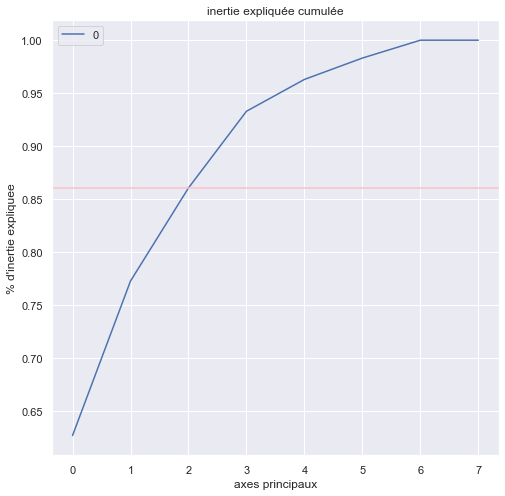

In [187]:
fig, ax = plt.subplots(figsize=(8, 8)) 

I.cumsum().plot(ax=ax)

plt.title("inertie expliquée cumulée")
plt.xlabel("axes principaux")
plt.ylabel("% d'inertie expliquee")

plt.axhline(float(I.iloc[0:3].sum()), color="pink")

### Interprétation pour une sélection de deux axes seulement

In [188]:
datas=C.iloc[:,0:2]
datas

,0,1
Année budgétaire,,
2013,4.079669,-0.413271
2014,5.249330,-0.790750
2015,3.944239,-0.568118
2016,-0.923078,0.771616
2017,-1.740116,4.243825
2018,-1.074324,0.160645
2019,-4.497143,-1.484456
2020,-5.038578,-1.919490


In [189]:
correlations[[0,1,2]]

,0,1,2
AIA,-0.980704,-0.059389,-0.051474
A&U,0.767515,-0.211449,-0.511913
Com & Med,-0.742043,0.252958,-0.021158
Cul & Art,0.662842,-0.424905,-0.566054
DfDr,-0.935457,-0.245735,-0.148159
TR,0.961095,0.181340,0.051775
ECO,-0.819033,-0.244660,-0.466117
EDU,0.204029,0.877043,0.220364
EMPL,-0.964241,-0.150266,-0.169030
ENV & ECO,-0.975853,-0.011932,0.039000


In [190]:
quality[[0,1,2]]

,0,1,2
Année budgétaire,,,
2013,0.689858,0.007079,0.136428
2014,0.889996,0.020196,0.026611
2015,0.725202,0.015046,0.143128
2016,0.117592,0.082168,0.021964
2017,0.133253,0.792564,0.035757
2018,0.119553,0.002673,0.658406
2019,0.786609,0.085708,0.002159
2020,0.743932,0.107966,0.025750


Au vu de la qualité de projection on garde les axes 0 et 1 pour la représentation:

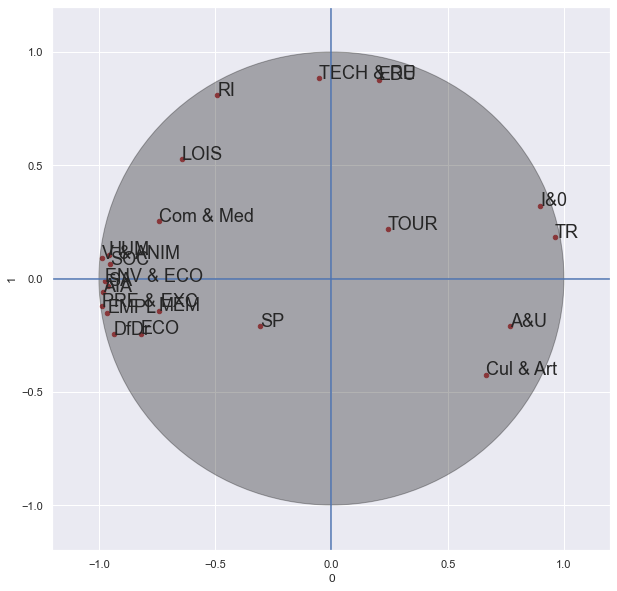

In [191]:
# bibliothèque et définition palette style pour graphes

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

current_palette = sns.color_palette()
axe_x = 0
axe_y = 1

fig, ax = plt.subplots(figsize=(10, 10)) 

draw = correlations.plot.scatter(x=axe_x, y=axe_y, ax=ax, color=current_palette[3])


for index, row in correlations.iterrows():
    draw.annotate(str(index), (row[axe_x], row[axe_y]),fontsize=18)

draw.add_patch(plt.Circle((0, 0), radius=1, color=(0, 0, 0, .3)))

plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.axvline(0)
plt.axhline(0)

plt.show()

Interpréations:

Axe d'étude 0:  
L'axe oppose les secteurs d'activité liés au social, la santé, l'humanitaire, l'environnement, la défense des droits et la lutte contre la précarité aux secteurs d'activité lié à la culture, le transport, l'urbanisme, les promotion et diffusion d'idées et opinions. 


Axe d'étude 1:  
On constate que plus on augmente sur l'axe plus le montant versé aux associations dans l'éducation, la technique & recherche ou les relations internationales augmente. 



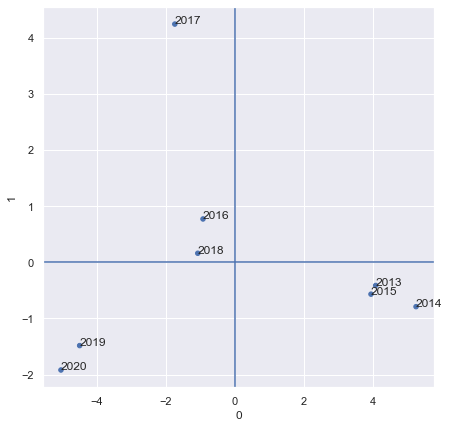

In [192]:
axe_x = 0
axe_y = 1

fig, ax = plt.subplots(figsize=(7, 7)) 

draw = C.plot.scatter(axe_x, axe_y, ax=ax, 
                      color=[current_palette[0]]*len(C.index))

for index, row in C.iterrows():
    draw.annotate(str(index), (row[axe_x], row[axe_y]))

plt.axvline(0)
plt.axhline(0)

plt.show() 

<AxesSubplot:xlabel='Année budgétaire'>

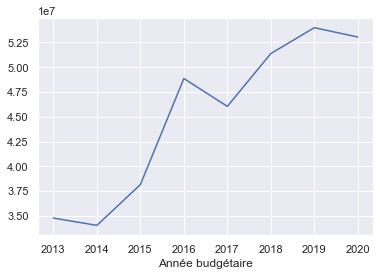

In [206]:

Budget_secteurs_by_year["SA"].plot()

<AxesSubplot:xlabel='Année budgétaire'>

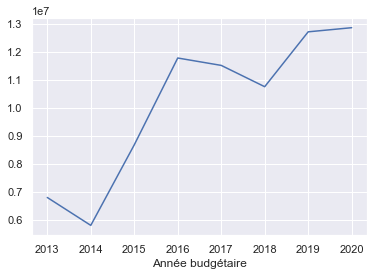

In [207]:

Budget_secteurs_by_year["HUM"].plot()

## Partitionnements des données suite à l'ACP réalisée

On va premièrement déterminer le nombre de classes optimal sur lequel réaliser le partitionnement:

In [194]:
from sklearn.cluster import KMeans
inertie = []

for nb in range(1, 9):
    kmeans = KMeans(n_clusters=nb,
                    n_init=10, 
                    max_iter=300).fit(datas)
    inertie.append(kmeans.inertia_)

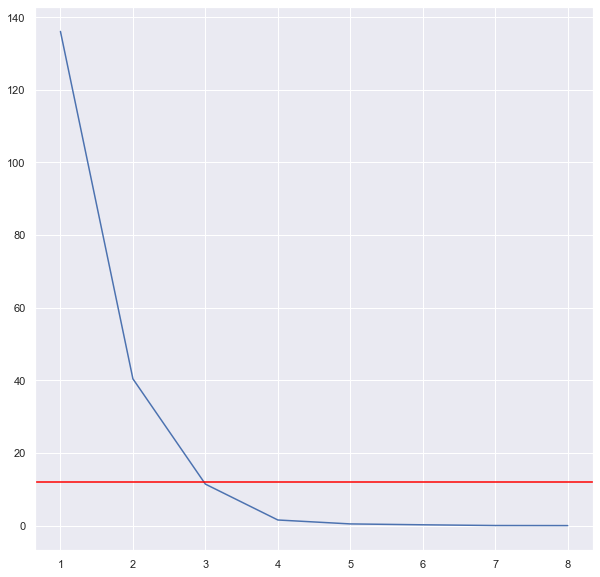

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax=plt.subplots(figsize=(10,10))

sns.lineplot(x=list(range(1,len(inertie)+1)),y=inertie,legend=False,ax=ax)
plt.axhline(y=12, color="red")

Gardons pour le moment un nombre de classes égale à 3 pour le partitionnement:

In [196]:
kmeans = KMeans(n_clusters=3,
                n_init=10, 
                max_iter=300).fit(datas)

clusters_kmeans = kmeans.predict(datas)


In [197]:
centers=kmeans.cluster_centers_
centers

array([[-4.76786015, -1.70197288],
       [ 4.42441275, -0.59071326],
       [-1.24583931,  1.72536185]])

In [198]:
kmeans.inertia_

11.421649788820995

In [199]:
clusters = [[], [], []]

for i, cluster in enumerate(clusters_kmeans):
    clusters[cluster].append(datas.index[i])
    
clusters

[[2019, 2020], [2013, 2014, 2015], [2016, 2017, 2018]]

In [200]:
#couleurs 
current_palette = sns.color_palette()
colors = {i: current_palette[i] for i in range(len(centers))}
colors

{0: (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 1: (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 2: (0.3333333333333333, 0.6588235294117647, 0.40784313725490196)}

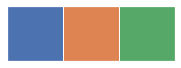

In [201]:
#Palette de couleurs qui sera utilisée pour la distinction des différentes classes sur le graphique
sns.palplot(current_palette[:len(centers)]) # https://seaborn.pydata.org/tutorial/color_palettes.html
plt.show()

In [202]:
datas

,0,1
Année budgétaire,,
2013,4.079669,-0.413271
2014,5.249330,-0.790750
2015,3.944239,-0.568118
2016,-0.923078,0.771616
2017,-1.740116,4.243825
2018,-1.074324,0.160645
2019,-4.497143,-1.484456
2020,-5.038578,-1.919490


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


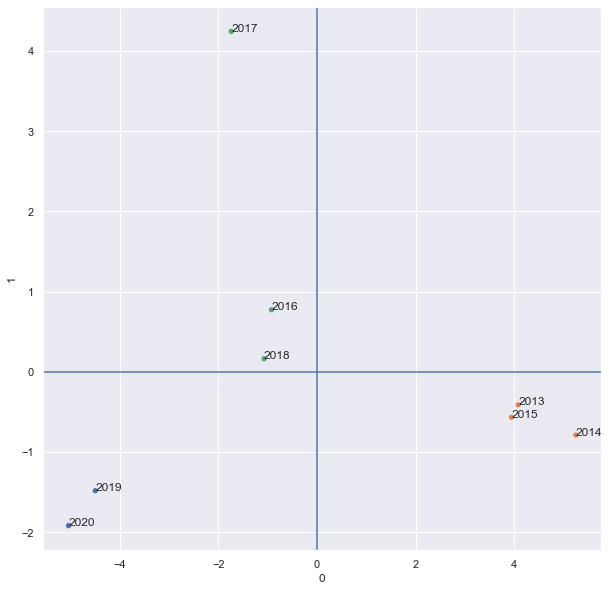

In [211]:
axe_x=0
axe_y=1
fig, ax = plt.subplots(figsize=(10, 10))


draw=sns.scatterplot(datas.iloc[:,0],datas.iloc[:,1],data=datas,
                 hue=clusters_kmeans,
                 palette=colors,
                 legend=False,
                 ax=ax)
plt.axhline(y=0)
plt.axvline(x=0)

for index, row in C.iterrows():
    draw.annotate(str(index),(row[axe_x], row[axe_y]))


plt.show() 